In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
from time import time
import pickle
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle


from context import predicate_search
from predicate_search import PredicateInduction, RobustNormal, Density, BottomUp, Predicate

In [2]:
data = pd.read_csv('../data/intel_sensor_s3.csv')
data.dtime = pd.to_datetime(data.dtime)

In [17]:
data[data.temperature.round(3)==122.153]

,moteid,temperature,humidity,light,voltage,dtime
83368,15.0,122.153,-4.00000,1847.36,2.27556,2004-03-02 15:49:25.114608
85168,15.0,122.153,-3.27191,1847.36,2.30202,2004-03-02 07:39:29.812714
85169,15.0,122.153,1.69454,1847.36,2.30202,2004-03-02 07:40:23.401811
85170,15.0,122.153,2.72497,1847.36,2.30202,2004-03-02 07:40:59.964933
85171,15.0,122.153,3.51504,1847.36,2.31097,2004-03-02 07:41:23.141843
85172,15.0,122.153,10.75530,1847.36,2.31097,2004-03-02 07:44:15.939767
85173,15.0,122.153,13.01150,1847.36,2.31097,2004-03-02 07:44:58.211213
85174,15.0,122.153,14.49220,1847.36,2.31097,2004-03-02 07:45:23.153435
85175,15.0,122.153,14.87050,1847.36,2.31097,2004-03-02 07:45:58.507635
85176,15.0,122.153,15.62540,1847.36,2.31097,2004-03-02 07:47:53.923766


In [15]:
data.temperature.max()

122.15299999999999

In [3]:
disc_cols = ['moteid']

In [4]:
refit = False

In [5]:
if refit:
    predicate_induction = PredicateInduction(data, disc_cols)
    with open('intel_sensor_s3_pixal.pkl', 'wb') as f:
        pickle.dump(predicate_induction, f)
else:
    with open('intel_sensor_s3_pixal.pkl', 'rb') as f:
        predicate_induction = pickle.load(f)

In [6]:
distances = predicate_induction.model.distance(predicate_induction.norm_data[['temperature']])

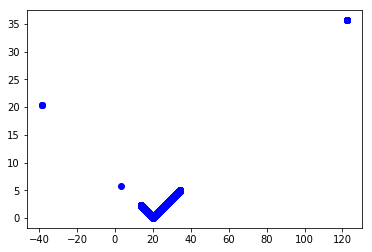

In [7]:
fig, ax = plt.subplots()
ax.plot(data.temperature, distances, 'bo');

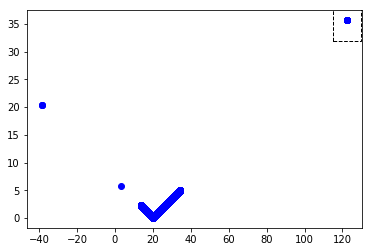

In [8]:
fig, ax = plt.subplots()
ax.plot(data.temperature, distances, 'bo')
rect = plt.Rectangle((115, 32), 15, 10, fill=False, facecolor='none', linestyle='--')
ax.add_patch(rect)

In [10]:
index1 = list(data[data.temperature > 122].index)
p1 = predicate_induction.find_predicates(targets=['temperature'], c=.5, index=index1, maxiters=2, topn=5)

iter: 0
merging
voltage in [72]: 2969.927026860172 voltage in [71, 72]: 3228.6510704707994
voltage in [71, 72]: 3228.6510704707994 voltage in [71, 72, 73]: 2266.9751344009355
humidity in [96]: 2100.0555403220997 humidity in [95, 96]: 2211.9890661682584

merged:
temperature in [99] 3746.0059279586026
voltage in [71, 72] 3228.6510704707994
humidity in [95, 96] 2211.9890661682584
voltage in [73] 668.9356376674191
moteid in [15] 404.68355336578924
dtime in [82] 247.62444244164743
intersecting 6
done intersecting

intersected:
moteid in [15] and dtime in [82] 3581.8667646659214
humidity in [95, 96] and moteid in [15] 2283.001066015156
voltage in [73] and dtime in [82] 1899.5717089515722

iter: 1
merging

merged:
moteid in [15] and dtime in [82] 3581.8667646659214
humidity in [95, 96] and moteid in [15] 2283.001066015156
voltage in [73] and dtime in [82] 1899.5717089515722
intersecting 3
done intersecting

intersected:



In [11]:
for p in p1:
    print(p, '\n')

((temperature >= 122.15299999999999 and temperature <= 122.15299999999999)) 

moteid in [15] and ((dtime >= '2004-03-02 07:40:59.642373454' and dtime <= '2004-03-02 23:59:59.543254')) 

((voltage >= 2.2707543757575754 and voltage <= 2.3342112060606057)) 

((humidity >= -1854.52 and humidity <= 17.294290909090932)) and moteid in [15] 

((voltage >= 0.0180369 and voltage <= 2.3659396212121213)) and ((dtime >= '2004-03-02 07:40:59.642373454' and dtime <= '2004-03-02 23:59:59.543254')) 



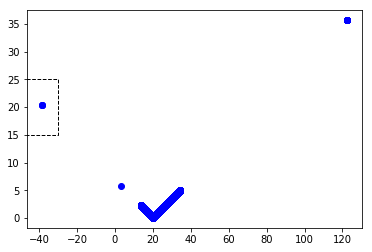

In [12]:
fig, ax = plt.subplots()
ax.plot(data.temperature, distances, 'bo')
rect = plt.Rectangle((-50, 15), 20, 10, fill=False, facecolor='none', linestyle='--')
ax.add_patch(rect)

In [13]:
index2 = list(data[data.temperature < -20].index)
p2 = predicate_induction.find_predicates(targets=['temperature'], c=.8, index=index2, maxiters=2, topn=5)

iter: 0
merging

merged:
humidity in [95] 519.5675576667295
temperature in [0] 255.98892951507787
intersecting 2
done intersecting

intersected:

iter: 1


In [14]:
for p in p2:
    print(p, '\n')

((humidity >= -21.299818181818182 and humidity <= -2.0027636363636248)) 

((temperature >= -38.4 and temperature <= -36.778252525252526)) 

